In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab04.ipynb")

# Lab 4: Functions and Visualizations

Welcome to Lab 4! This week, we'll learn about functions, table methods such as `apply`, and how to generate visualizations! 

Recommended Reading:

* [Applying a Function to a Column](https://aup-cs2065.github.io/textbook/html/chapters/08/1/Applying_a_Function_to_a_Column.html)
* [Visualizations](https://aup-cs2065.github.io/textbook/html/chapters/07/Visualization.html)

First, set up the notebook by running the cell below.

In [1]:
import numpy as np

# These lines set up graphing capabilities.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', FutureWarning)
import pandas as pd
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


## 1. Defining functions

Let's write a very simple function that converts a proportion to a percentage by multiplying it by 100.  For example, the value of `to_percentage(.5)` should be the number 50 (no percent sign).

A function definition has a few parts.

##### `def`
It always starts with `def` (short for **def**ine):

    def

##### Name
Next comes the name of the function.  Like other names we've defined, it can't start with a number or contain spaces. Let's call our function `to_percentage`:
    
    def to_percentage

##### Signature
Next comes something called the *signature* of the function.  This tells Python how many arguments your function should have, and what names you'll use to refer to those arguments in the function's code.  A function can have any number of arguments (including 0!). 

`to_percentage` should take one argument, and we'll call that argument `proportion` since it should be a proportion.

    def to_percentage(proportion)
    
If we want our function to take more than one argument, we add a comma between each argument name. Note that if we had zero arguments, we'd still place the parentheses () after than name. 

We put a colon after the signature to tell Python it's over. If you're getting a syntax error after defining a function, check to make sure you remembered the colon!

    def to_percentage(proportion):

##### Documentation
Functions can do complicated things, so you should write an explanation of what your function does.  For small functions, this is less important, but it's a good habit to learn from the start.  Conventionally, Python functions are documented by writing an **indented** triple-quoted string:

    def to_percentage(proportion):
        """Converts a proportion to a percentage."""
    
    
##### Body
Now we start writing code that runs when the function is called.  This is called the *body* of the function and every line **must be indented with a tab**.  Any lines that are *not* indented and left-aligned with the def statement is considered outside the function. 

Some notes about the body of the function:
- We can write code that we would write anywhere else.  
- We use the arguments defined in the function signature. We can do this because we assume that when we call the function, values are already assigned to those arguments.
- We generally avoid referencing variables defined *outside* the function. If you would like to reference variables outside of the function, pass them through as arguments!


Now, let's give a name to the number we multiply a proportion by to get a percentage:

    def to_percentage(proportion):
        """Converts a proportion to a percentage."""
        factor = 100

##### `return`
The special instruction `return` is part of the function's body and tells Python to make the value of the function call equal to whatever comes right after `return`.  We want the value of `to_percentage(.5)` to be the proportion .5 times the factor 100, so we write:

    def to_percentage(proportion):
        """Converts a proportion to a percentage."""
        factor = 100
        return proportion * factor
        
`return` only makes sense in the context of a function, and **can never be used outside of a function**. `return` is always the last line of the function because Python stops executing the body of a function once it hits a `return` statement.

*Note:*  `return` inside a function tells Python what value the function evaluates to. However, there are other functions, like `print`, that have no `return` value. For example, `print` simply prints a certain value out to the console. 

`return` and `print` are **very** different. 

**Question 1.1.** Define `to_percentage` in the cell below.  Call your function to convert the proportion .2 to a percentage.  Name that percentage `twenty_percent`.

<!--
BEGIN QUESTION
name: q11
-->

In [3]:


def to_percentage(proportion):
    """ Convert proportion to percentage """
    percentage = proportion * 100
    return percentage

twenty_percent = to_percentage(.2)
twenty_percent



20.0

In [4]:
grader.check("q11")

RuntimeError: Malformed test file: does not define the global variable 'OK_FORMAT'

Like you’ve done with built-in functions in previous labs (max, abs, etc.), you can pass in named values as arguments to your function.

**Question 1.2.** Use `to_percentage` again to convert the proportion named `a_proportion` (defined below) to a percentage called `a_percentage`.

*Note:* You don't need to define `to_percentage` again!  Like other named values, functions stick around after you define them.

<!--
BEGIN QUESTION
name: q12
-->

In [5]:


a_proportion = 2**(.5) / 2
a_percentage = to_percentage(a_proportion)
a_percentage



70.71067811865476

In [ ]:
grader.check("q12")

Here's something important about functions: the names assigned *within* a function body are only accessible within the function body. Once the function has returned, those names are gone.  So even if you created a variable called `factor` and defined `factor = 100` inside of the body of the `to_percentage` function and then called `to_percentage`, `factor` would not have a value assigned to it outside of the body of `to_percentage`:

In [ ]:
# You should see an error when you run this.  (If you don't, you might
# have defined factor somewhere above.)
factor

As we've seen with built-in functions, functions can also take strings (or arrays, or tables) as arguments, and they can return those things, too.

**Question 1.3.** Define a function called `disemvowel`.  It should take a single string as its argument.  (You can call that argument whatever you want.)  It should return a copy of that string, but with all the characters that are vowels removed.  (In English, the vowels are the characters "a", "e", "i", "o", and "u".) You can use as many lines inside of the function to do this as you’d like.

*Hint:* To remove all the "a"s from a string, you can use `that_string.replace("a", "")`.  The `.replace` method for strings returns a new string, so you can call `replace` multiple times, one after the other. 

<!--
BEGIN QUESTION
name: q13
-->

In [6]:
def disemvowel(a_string):
    without_a = a_string.replace('a', '')
    without_e = without_a.replace('e', '')
    without_i = without_e.replace('i', '')
    without_o = without_i.replace('o', '')
    without_u = without_o.replace('u', '')
    return without_u

# An example call to your function.  (It's often helpful to run
# an example call from time to time while you're writing a function,
# to see how it currently works.)
disemvowel("Can you read this without vowels?")

'Cn y rd ths wtht vwls?'

In [ ]:
grader.check("q13")

##### Calls on calls on calls
Just as you write a series of lines to build up a complex computation, it's useful to define a series of small functions that build on each other.  Since you can write any code inside a function's body, you can call other functions you've written.

If a function is a like a recipe, defining a function in terms of other functions is like having a recipe for cake telling you to follow another recipe to make the frosting, and another to make the jam filling.  This makes the cake recipe shorter and clearer, and it avoids having a bunch of duplicated frosting recipes.  It's a foundation of productive programming.

For example, suppose you want to count the number of characters *that aren't vowels* in a piece of text.  One way to do that is this to remove all the vowels and count the size of the remaining string.

**Question 1.4.** Write a function called `num_non_vowels`.  It should take a string as its argument and return a number.  That number should be the number of characters in the argument string that aren't vowels. You should use the `disemvowel` function you wrote above inside of the `num_non_vowels` function.

*Hint:* The function `len` takes a string as its argument and returns the number of characters in it.

<!--
BEGIN QUESTION
name: q14
-->

In [7]:
def num_non_vowels(a_string):
    """The number of characters in a string, minus the vowels."""
    return len(disemvowel(a_string))

# Try calling your function yourself to make sure the output is what
# you expect. You can also use the interact function if you'd like.

In [ ]:
grader.check("q14")

Functions can also encapsulate code that *displays output* instead of computing a value. For example, if you call `print` inside a function, and then call that function, something will get printed.

The `movies_by_year` dataset in the textbook has information about movie sales in recent years.  Suppose you'd like to display the year with the 5th-highest total gross movie sales, printed in a human-readable way.  You might do this:

In [9]:
movies_by_year = pd.read_csv("movies_by_year.csv")
rank = 5
fifth_from_top_movie_year = movies_by_year.sort_values("Total Gross", ascending=False).Year.values[rank-1]
print("Year number", rank, "for total gross movie sales was:", fifth_from_top_movie_year)

Year number 5 for total gross movie sales was: 2014


In [8]:
df=movies_by_year.sort_values("Total Gross", ascending=False)
df.reset_index()
fifth_from_top_movie_year = movies_by_year.sort_values("Total Gross", ascending=False).Year[rank]
print("Year number", rank, "for total gross movie sales was:", fifth_from_top_movie_year)

Year number 5 for total gross movie sales was: 2010


In [4]:
movies_by_year.sort_values("Total Gross", ascending=False).Year.values

array([2015, 2013, 2012, 2009, 2010, 2014, 2011, 2007, 2008, 2004, 2003,
       2006, 2002, 2005, 2001, 2000, 1999, 1998, 1997, 1996, 1995, 1994,
       1993, 1989, 1990, 1992, 1991, 1988, 1987, 1984, 1986, 1983, 1985,
       1982, 1981, 1980])

After writing this, you realize you also wanted to print out the 2nd and 3rd-highest years.  Instead of copying your code, you decide to put it in a function.  Since the rank varies, you make that an argument to your function.

**Question 1.5.** Write a function called `print_kth_top_movie_year`.  It should take a single argument, the rank of the year (like 2, 3, or 5 in the above examples).  It should print out a message like the one above.  

*Note:* Your function shouldn't have a `return` statement.

<!--
BEGIN QUESTION
name: q15
-->

In [16]:
def print_kth_top_movie_year(k):
    # Our solution used 2 lines.
    kth_from_top_movie_year = movies_by_year.sort_values("Total Gross", ascending=False).Year.values[k-1]
    print("Year number", k, "for total gross movie sales was:", kth_from_top_movie_year)


# Example calls to your function:
print_kth_top_movie_year(2)
print_kth_top_movie_year(3)
print_kth_top_movie_year(5)

Year number 2 for total gross movie sales was: 2013
Year number 3 for total gross movie sales was: 2012
Year number 5 for total gross movie sales was: 2010


In [ ]:
grader.check("q15")

In [17]:
# interact also allows you to pass in an array for a function argument. It will
# then present a dropdown menu of options.
_ = interact(print_kth_top_movie_year, k=np.arange(1, 10))

interactive(children=(Dropdown(description='k', options=(1, 2, 3, 4, 5, 6, 7, 8, 9), value=1), Output()), _dom…

### `print` is not the same as `return`
The `print_kth_top_movie_year(k)` function prints the total gross movie sales for the year that was provided! However, since we did not return any value in this function, we can not use it after we call it. Let's look at an example of another function that prints a value but does not return it.

In [18]:
def print_number_five():
    print(5)

In [19]:
print_number_five()

5


However, if we try to use the output of `print_number_five()`, we see that the value `5` is printed but we get a TypeError when we try to add the number 2 to it!

In [20]:
print_number_five_output = print_number_five()
print_number_five_output + 2

5


TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'

It may seem that `print_number_five()` is returning a value, 5. In reality, it just displays the number 5 to you without giving you the actual value! If your function prints out a value without returning it and you try to use that value, you will run into errors, so be careful!

Explain to your neighbor how you might add a line of code to the `print_number_five` function (after `print(5)`) so that the code `print_number_five_output + 5` would result in the value `10`, rather than an error.

## 2. Functions and CEO Incomes

In this question, we'll look at the 2015 compensation of CEOs at the 100 largest companies in California. The data was compiled from a [Los Angeles Times analysis](http://spreadsheets.latimes.com/california-ceo-compensation/), and ultimately came from [filings](https://www.sec.gov/answers/proxyhtf.htm) mandated by the SEC from all publicly-traded companies. Two companies have two CEOs, so there are 102 CEOs in the dataset.

We've copied the raw data from the LA Times page into a file called `raw_compensation.csv`. (The page notes that all dollar amounts are in **millions of dollars**.)

In [21]:
raw_compensation = pd.read_csv('raw_compensation.csv')
raw_compensation

,Rank,Name,Company (Headquarters),Total Pay,% Change,Cash Pay,Equity Pay,Other Pay,Ratio of CEO pay to average industry worker pay
0,1,Mark V. Hurd*,Oracle (Redwood City),$53.25,(No previous year),$0.95,$52.27,$0.02,362.00000
1,2,Safra A. Catz*,Oracle (Redwood City),$53.24,(No previous year),$0.95,$52.27,$0.02,362.00000
2,3,Robert A. Iger,Walt Disney (Burbank),$44.91,-3%,$24.89,$17.28,$2.74,477.00000
3,4,Marissa A. Mayer,Yahoo! (Sunnyvale),$35.98,-15%,$1.00,$34.43,$0.55,342.00000
4,5,Marc Benioff,salesforce.com (San Francisco),$33.36,-16%,$4.65,$27.26,$1.45,338.00000
...,...,...,...,...,...,...,...,...,...
97,98,Gregory N. Roberts,A-Mark Precious Metals (Santa Monica),$0.94,-11%,$0.93,$0.00,$0.02,17.00000
98,99,Jose L. Laparte,PriceSmart (San Diego),$0.81,-7%,$0.71,$0.00,$0.10,32.00000
99,100,Jack Dorsey,Twitter (San Francisco),$0.07,(No previous year),$0.00,$0.00,$0.07,0.63000
100,101,Elon R. Musk,Tesla Motors (Palo Alto),$0.04,6%,$0.04,$0.00,$0.00,0.46000


We want to compute the average of the CEOs' pay. Try running the cell below.

In [22]:
np.average(raw_compensation["Total Pay"])

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

You should see a TypeError. Let's examine why this error occurred by looking at the values in the `Total Pay` column. 

**Question 2.1.** Use the `type` function and set `total_pay_type` to the type of the first value in the "Total Pay" column.

<!--
BEGIN QUESTION
name: q21
-->

In [26]:
total_pay_type = type(raw_compensation['Total Pay'].iloc[0])
total_pay_type

str

In [ ]:
grader.check("q21")

**Question 2.2.** You should have found that the values in the `Total Pay` column are strings. It doesn't make sense to take the average of string values, so we need to convert them to numbers if we want to do this. Extract the first value in `Total Pay`.  It's Mark Hurd's pay in 2015, in *millions* of dollars.  Call it `mark_hurd_pay_string`.

<!--
BEGIN QUESTION
name: q22
-->

In [28]:
mark_hurd_pay_string = raw_compensation['Total Pay'].iloc[0]
mark_hurd_pay_string

'$53.25 '

In [ ]:
grader.check("q22")

**Question 2.3.** Convert `mark_hurd_pay_string` to a number of *dollars*. 

Some hints, as this question requires multiple steps:
- The string method `strip` will be useful for removing the dollar sign; it removes a specified character from the start or end of a string.  For example, the value of `"100%".strip("%")` is the string `"100"`.  
- You'll also need the function `float`, which converts a string that looks like a number to an actual number.  
- Finally, remember that the answer should be in dollars, not millions of dollars.

<!--
BEGIN QUESTION
name: q23
-->

In [29]:
mark_hurd_pay = int(float(mark_hurd_pay_string.strip("$")) * 1000000)
mark_hurd_pay

53250000

In [ ]:
grader.check("q23")

To compute the average pay, we need to do this for every CEO.  But that looks like it would involve copying this code 102 times.

This is where functions come in.  First, we'll define a new function, giving a name to the expression that converts "total pay" strings to numeric values.  Later in this lab, we'll see the payoff: we can call that function on every pay string in the dataset at once.

The next section of this lab explains how to define a function For now, just fill in the ellipses in the cell below.

**Question 2.4.** Copy the expression you used to compute `mark_hurd_pay`, and use it as the return expression of the function below. But make sure you replace the specific `mark_hurd_pay_string` with the generic `pay_string` name specified in the first line in the `def` statement.

*Hint*: When dealing with functions, you should generally not be referencing any variable outside of the function. Usually, you want to be working with the arguments that are passed into it, such as `pay_string` for this function. If you're using `mark_hurd_pay_string` within your function, you're referencing an outside variable!

<!--
BEGIN QUESTION
name: q24
-->

In [30]:


def convert_pay_string_to_number(pay_string):
    """Converts a pay string like '$100' (in millions) to a number of dollars."""
    return int(float(pay_string.strip("$")) * 1000000)



In [ ]:
grader.check("q24")

Running that cell doesn't convert any particular pay string. Instead, it creates a function called `convert_pay_string_to_number` that can convert *any* string with the right format to a number representing millions of dollars.

We can call our function just like we call the built-in functions we've seen. It takes one argument -- a string -- and it returns a float.

In [31]:
convert_pay_string_to_number('$42')

42000000

In [32]:
convert_pay_string_to_number(mark_hurd_pay_string)

53250000

In [38]:
# We can also compute Safra Catz's pay in the same way:

convert_pay_string_to_number(raw_compensation[raw_compensation.Name.str.contains('Safra', regex=False)]['Total Pay'].iloc[0]
)



53240000

So, what have we gained by defining the `convert_pay_string_to_number` function? 
Well, without it, we'd have to copy the code `10**6 * float(some_pay_string.strip("$"))` each time we wanted to convert a pay string.  Now we just call a function whose name says exactly what it's doing.

## 3. `apply`ing functions

Defining a function is a lot like giving a name to a value with `=`.  In fact, a function is a value just like the number 1 or the text "data"!

For example, we can make a new name for the built-in function `max` if we want:

In [39]:
our_name_for_max = max
our_name_for_max(2, 6)

6

The old name for `max` is still around:

In [40]:
max(2, 6)

6

Try just writing `max` or `our_name_for_max` (or the name of any other function) in a cell, and run that cell.  Python will print out a (very brief) description of the function.

In [41]:
max

<function max>

Now try writing `?max` or `?our_name_for_max` (or the name of any other function) in a cell, and run that cell.  A information box should show up at the bottom of your screen a longer description of the function

*Note: You can also press Shift+Tab after clicking on a name to see similar information!*

In [42]:
?our_name_for_max

Let's look at what happens when we set `max`to a non-function value. You'll notice that a TypeError will occur when you try calling `max`. Things like integers and strings are not callable. Look out for any functions that might have been renamed when you encounter this type of error

In [43]:
max = 6
max(2, 6)

TypeError: 'int' object is not callable

In [44]:
# This cell resets max to the built-in function. Just run this cell, don't change its contents
import builtins
max = builtins.max

Why is this useful?  Since functions are just values, it's possible to pass them as arguments to other functions.  Here's a simple but not-so-practical example: we can make an array of functions.

In [51]:
np.array([max, np.average,'=='])

array([<built-in function max>, <function average at 0x7f13826eb940>,
       '=='], dtype=object)

**Question 3.1.** Make an array containing any 3 other functions you've seen.  Call it `some_functions`.

<!--
BEGIN QUESTION
name: q31
-->

In [52]:
some_functions = np.array([sum, min, max])
some_functions

array([<built-in function sum>, <built-in function min>,
       <built-in function max>], dtype=object)

In [ ]:
grader.check("q31")

Working with functions as values can lead to some funny-looking code. For example, see if you can figure out why the following code works. Check your explanation with a neighbor or a staff member.

In [62]:
np.array([max, np.average,np.equal]).item(0)(4, -2, 7)

7

A more useful example of passing functions to other functions as arguments is the table method `apply`.

`apply` calls a function many times, once on *each* element in a column of a table.  It produces an *array* of the results.  Here we use `apply` to convert every CEO's pay to a number, using the function you defined:

In [65]:
raw_compensation['Total Pay'].apply(convert_pay_string_to_number)

0      53250000
1      53240000
2      44910000
3      35980000
4      33360000
         ...   
97       940000
98       810000
99        70000
100       40000
101           0
Name: Total Pay, Length: 102, dtype: int64

Here's an illustration of what that did:

<img src="apply.png"/>

Note that we didn’t write `raw_compensation.apply(convert_pay_string_to_number(), “Total Pay”)` or `raw_compensation.apply(convert_pay_string_to_number(“Total Pay”))`. We just passed the name of the function, with no parentheses, to `apply`, because all we want to do is let `apply` know the name of the function we’d like to use and the name of the column we’d like to use it on. `apply` will then call the function `convert_pay_string_to_number` on each value in the column for us!

**Question 3.2.** Using `apply`, make a table that's a copy of `raw_compensation` with one additional column called `Total Pay ($)`.  That column should contain the result of applying `convert_pay_string_to_number` to the `Total Pay` column (as we did above).  Call the new table `compensation`.

<!--
BEGIN QUESTION
name: q32
-->

In [67]:

compensation=raw_compensation
compensation["Total Pay ($)"] = raw_compensation['Total Pay'].apply(convert_pay_string_to_number).values
compensation



,Rank,Name,Company (Headquarters),Total Pay,% Change,Cash Pay,Equity Pay,Other Pay,Ratio of CEO pay to average industry worker pay,Total Pay ($)
0,1,Mark V. Hurd*,Oracle (Redwood City),$53.25,(No previous year),$0.95,$52.27,$0.02,362.00000,53250000
1,2,Safra A. Catz*,Oracle (Redwood City),$53.24,(No previous year),$0.95,$52.27,$0.02,362.00000,53240000
2,3,Robert A. Iger,Walt Disney (Burbank),$44.91,-3%,$24.89,$17.28,$2.74,477.00000,44910000
3,4,Marissa A. Mayer,Yahoo! (Sunnyvale),$35.98,-15%,$1.00,$34.43,$0.55,342.00000,35980000
4,5,Marc Benioff,salesforce.com (San Francisco),$33.36,-16%,$4.65,$27.26,$1.45,338.00000,33360000
...,...,...,...,...,...,...,...,...,...,...
97,98,Gregory N. Roberts,A-Mark Precious Metals (Santa Monica),$0.94,-11%,$0.93,$0.00,$0.02,17.00000,940000
98,99,Jose L. Laparte,PriceSmart (San Diego),$0.81,-7%,$0.71,$0.00,$0.10,32.00000,810000
99,100,Jack Dorsey,Twitter (San Francisco),$0.07,(No previous year),$0.00,$0.00,$0.07,0.63000,70000
100,101,Elon R. Musk,Tesla Motors (Palo Alto),$0.04,6%,$0.04,$0.00,$0.00,0.46000,40000


In [ ]:
grader.check("q32")

Now that we have all the pays as numbers, we can learn more about them through computation.

**Question 3.3.** Compute the average total pay of the CEOs in the dataset.

<!--
BEGIN QUESTION
name: q33
-->

In [68]:
average_total_pay = compensation['Total Pay ($)'].mean()
average_total_pay

11445294.088235294

In [ ]:
grader.check("q33")

**Question 3.4.** Companies pay executives in a variety of ways: in cash, by granting stock or other equity in the company, or with ancillary benefits (like private jets).  Compute the proportion of each CEO's pay that was cash.  (Your answer should be an array of numbers, one for each CEO in the dataset.)

*Note:* When you answer this question, you'll encounter a red box appearing below your code cell that says something like `RuntimeWarning: invalid value encountered in true_divide`. Don't worry too much about the message. Warnings are raised by Python when it encounters an unusual condition in your code, but the condition is not severe enough to warrant throwing an error. 

The warning below is Python's cryptic way of telling you that you're dividing a number by zero. If you extract the values in `Total Pay ($)` as an array, you'll see that the last element is 0.

<!--
BEGIN QUESTION
name: q34
-->

In [70]:
cash_proportion = compensation['Cash Pay'].apply(convert_pay_string_to_number)/compensation['Total Pay ($)']
cash_proportion

0      0.017840
1      0.017844
2      0.554220
3      0.027793
4      0.139388
         ...   
97     0.989362
98     0.876543
99     0.000000
100    1.000000
101         NaN
Length: 102, dtype: float64

In [ ]:
grader.check("q34")

Check out the `% Change` column in `compensation`.  It shows the percentage increase in the CEO's pay from the previous year.  For CEOs with no previous year on record, it instead says "(No previous year)".  The values in this column are *strings*, not numbers, so like the `Total Pay` column, it's not usable without a bit of extra work.

Given your current pay and the percentage increase from the previous year, you can compute your previous year's pay.  For example, if your pay is $\$120$ this year, and that's an increase of 50% from the previous year, then your previous year's pay was $\frac{\$120}{1 + \frac{50}{100}}$, or \$80.

**Question 3.5.** Create a new table called `with_previous_compensation`.  It should be a copy of `compensation`, but with the "(No previous year)" CEOs filtered out, and with an extra column called `2014 Total Pay ($)`.  That column should have each CEO's pay in 2014.

*Hint 1:* You can print out your results after each step to make sure you're on the right track.

*Hint 2:* We've provided a structure that you can use to get to the answer. However, if it's confusing, feel free to delete the current structure and approach the problem your own way!

<!--
BEGIN QUESTION
name: q35
-->

In [88]:

def prevCompensation(current, increase):
    if current == 0:
        return 0
    else:
        return current / (1 + stripPercentage(increase) / current) 

def change_int(a_str):
    return int(float(a_str.strip("%")))


with_previous_compensation=compensation
#Remoeve "(No previous year)"
with_previous_compensation = with_previous_compensation.loc[with_previous_compensation["% Change"]!="(No previous year)"]
# Add    "2014 Total Pay ($)"
salary_2014=with_previous_compensation.apply(lambda x: prevCompensation(x['Total Pay ($)'], x['% Change']), axis=1)
with_previous_compensation['2014 Total Pay ($)']=salary_2014.values
with_previous_compensation



/tmp/ipykernel_1375435/2840608930.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  with_previous_compensation['2014 Total Pay ($)']=salary_2014.values


,Rank,Name,Company (Headquarters),Total Pay,% Change,Cash Pay,Equity Pay,Other Pay,Ratio of CEO pay to average industry worker pay,Total Pay ($),2014 Total Pay ($)
2,3,Robert A. Iger,Walt Disney (Burbank),$44.91,-3%,$24.89,$17.28,$2.74,477.00000,44910000,4.491000e+07
3,4,Marissa A. Mayer,Yahoo! (Sunnyvale),$35.98,-15%,$1.00,$34.43,$0.55,342.00000,35980000,3.598002e+07
4,5,Marc Benioff,salesforce.com (San Francisco),$33.36,-16%,$4.65,$27.26,$1.45,338.00000,33360000,3.336002e+07
5,6,John H. Hammergren,McKesson (San Francisco),$24.84,-4%,$12.10,$12.37,$0.37,222.00000,24840000,2.484000e+07
6,7,John S. Watson,Chevron (San Ramon),$22.04,-15%,$4.31,$14.68,$3.05,183.00000,22040000,2.204002e+07
...,...,...,...,...,...,...,...,...,...,...,...
96,97,David G. Hirz,Smartæ& Final Stores (Commerce),$1.53,-66%,$1.50,$0.00,$0.04,26.00000,1530000,1.530066e+06
97,98,Gregory N. Roberts,A-Mark Precious Metals (Santa Monica),$0.94,-11%,$0.93,$0.00,$0.02,17.00000,940000,9.400110e+05
98,99,Jose L. Laparte,PriceSmart (San Diego),$0.81,-7%,$0.71,$0.00,$0.10,32.00000,810000,8.100070e+05
100,101,Elon R. Musk,Tesla Motors (Palo Alto),$0.04,6%,$0.04,$0.00,$0.00,0.46000,40000,3.999400e+04


In [ ]:
grader.check("q35")

**Question 3.6.** What was the average pay of these CEOs in 2014?

<!--
BEGIN QUESTION
name: q36
-->

In [91]:
average_pay_2014 = with_previous_compensation["2014 Total Pay ($)"].mean()
average_pay_2014

10787401.703941908

In [ ]:
grader.check("q36")

**Why is `apply` useful?**

For operations like arithmetic, or the functions in the NumPy library, you don't need to use `apply`, because they automatically work on each element of an array.  But there are many things that don't.  The string manipulation we did in today's lab is one example.  Since you can write any code you want in a function, `apply` gives you total control over how you operate on data.

## 4. Histograms
Earlier, we computed the average pay among the CEOs in our 102-CEO dataset.  The average doesn't tell us everything about the amounts CEOs are paid, though.  Maybe just a few CEOs make the bulk of the money, even among these 102.

We can use a *histogram* method to display the *distribution* of a set of numbers.  The table method `hist` takes a single argument, the name of a column of numbers.  It produces a histogram of the numbers in that column.

**Question 4.1.** Make a histogram of the total pay of the CEOs in `compensation`. Check with your neighbor or a staff member to make sure you have the right plot.

<!--
BEGIN QUESTION
name: q41
-->

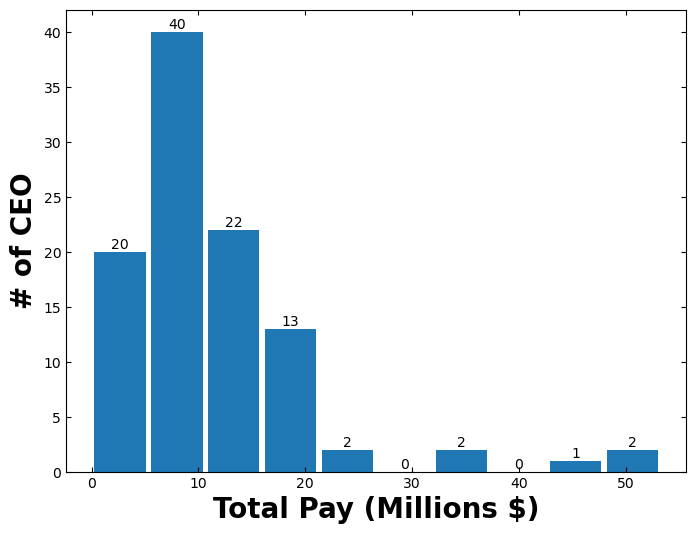

In [106]:
fig, ax1 = plt.subplots(figsize=(8,6), facecolor='w', edgecolor='k')

# Horizontal Bar Plot
ounts, edges, bars=ax1.hist(compensation['Total Pay ($)'].values/1000000,rwidth=0.9)
ax1.set_ylabel('# of CEO',fontsize=20,fontweight='bold')
ax1.set_xlabel('Total Pay (Millions $)',fontsize=20,fontweight='bold')
ax1.tick_params(axis='both', which='major', labelsize=10,direction='in',right='on',top='on')
plt.bar_label(bars)
plt.show()

**Question 4.2.** How many CEOs made more than $30 million in total pay? Find the value using code, then check that the value you found is consistent with what you see in the histogram.

*Hint:* Use the table method `where` and the property `num_rows`.

<!--
BEGIN QUESTION
name: q42
-->

In [98]:
num_ceos_more_than_30_million_2 = len(compensation.loc[compensation['Total Pay ($)']>30000000,'Total Pay ($)'])
num_ceos_more_than_30_million_2

5

In [ ]:
grader.check("q42")

Great job! You're finished with lab 4! Be sure to...

* **run all the tests** (the next cell has a shortcut for that),
* **Save and Checkpoint** from the File menu,
* **run the last cell to submit your work**,
* and **ask one of the staff members to check you off**.

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)